<a href="https://colab.research.google.com/github/yozasetya/resep-masakan-app/blob/main/Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TITANIC SURVIVAL ANALYSIS**

## **Import Libraries**

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [75]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
# import data
df = pd.read_excel('/content/drive/MyDrive/DATA/titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


## **Eksplorasi Data**

In [77]:
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [78]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [80]:
df.shape

(500, 4)

In [81]:
df.dtypes

,0
survived,int64
name,object
sex,object
age,float64


In [82]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [83]:
categoricals = ['name', 'sex']

numericals = ['age', 'survived']

In [84]:
df[numericals].describe()

,age,survived
count,451.000000,500.000000
mean,35.917775,0.540000
std,14.766454,0.498897
min,0.666700,0.000000
25%,24.000000,0.000000
50%,35.000000,1.000000
75%,47.000000,1.000000
max,80.000000,1.000000


In [85]:
df[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


In [86]:
df.survived.value_counts()

,count
survived,
1,270
0,230


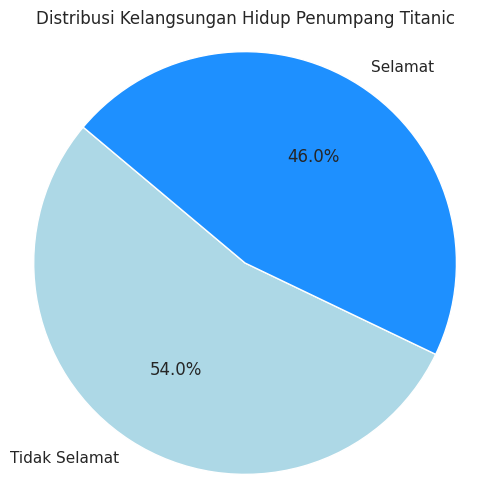

In [87]:
# Hitung jumlah yang selamat dan tidak selamat
survival_counts = df['survived'].value_counts()
labels = ['Tidak Selamat', 'Selamat']
colors = ['lightblue', 'dodgerblue']  # nuansa biru

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Kelangsungan Hidup Penumpang Titanic')
plt.axis('equal')  # Untuk pie bulat sempurna
plt.show()


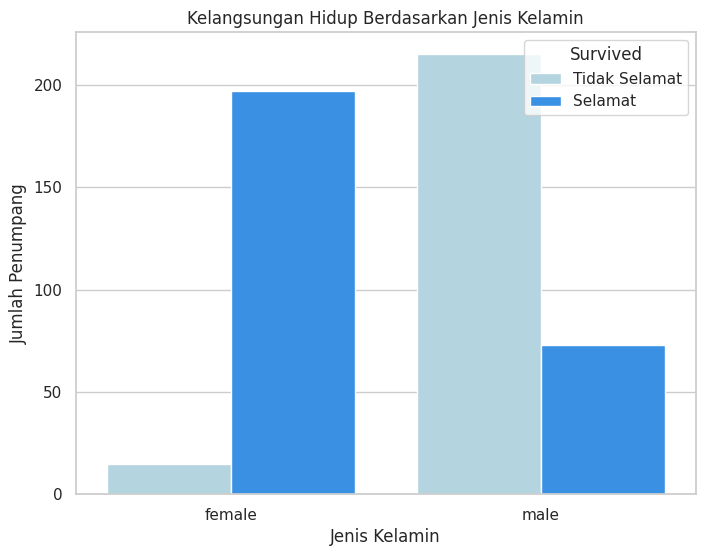

In [88]:
# Set tema visual
sns.set(style="whitegrid")

# Ukuran figure
plt.figure(figsize=(8, 6))

# Countplot dengan hue untuk survival (0 = tidak selamat, 1 = selamat)
sns.countplot(data=df, x='sex', hue='survived', palette=['lightblue', 'dodgerblue'])

# Judul dan label
plt.title('Kelangsungan Hidup Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Survived', labels=['Tidak Selamat', 'Selamat'])

plt.show()


Text(0.5, 1.0, 'Distribusi Umur Penumpang')

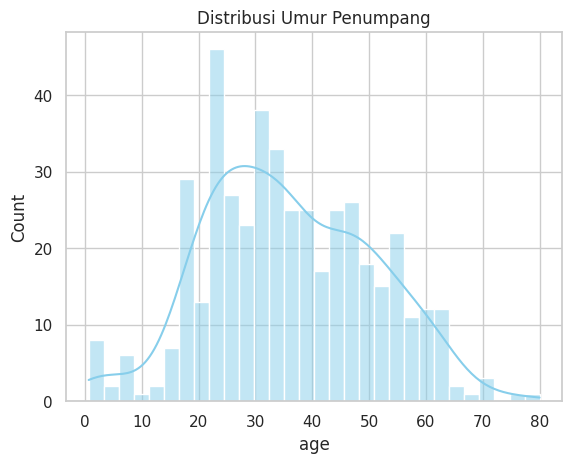

In [89]:
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi Umur Penumpang')

## **Preprocessing Data**

### **Duplicate Handling**

In [90]:
len(df)

500

In [91]:
len(df.drop_duplicates())

499

In [92]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.998

In [93]:
list(df.columns)

['survived', 'name', 'sex', 'age']

In [94]:
# Langkah 1: Ambil baris duplikat (termasuk yang asli)
duplicates = df[df.duplicated(keep=False)]
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [95]:
duplicates.groupby(list(df.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [96]:
duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah duplikat')

,survived,name,sex,age,jumlah duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [112]:
# Langkah 2: Hitung frekuensi kemunculan tiap baris duplikat
duplicate_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah_duplikat')

# Langkah 3: Urutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)

# Tampilkan hasil
sorted_duplicates

,survived,name,sex,age,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [98]:
#Handling Drop duplicate
df = df.drop_duplicates()

In [114]:
len(df.drop_duplicates()) / len(df)

1.0

In [113]:
df.duplicated().sum()

np.int64(0)

### **Missing Value Handling**

In [100]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [101]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= survived =================


,count
survived,
1,269
0,230



============= name =================


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============= sex =================


,count
sex,
male,288
female,211



============= age =================


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [102]:
total_rows = len(df)
total_rows

499

In [103]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [104]:
# percentage version
total_rows = len(df)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in df.columns:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [106]:
df['sex'].dtype

dtype('O')

In [107]:
df['sex'].mode()[0]

'male'

In [108]:
df['age'].median()

35.0

In [109]:
df['age'].fillna(df['age'].median(), inplace=True)

<ipython-input-109-52ac7884633d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-109-52ac7884633d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'].fillna(df['age'].median(), inplace=True)


In [110]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB
